In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft, ifft
from math import pi, sin
import matplotlib.image as mpimg
from scipy.signal import lfilter, stft, istft


eps = sys.float_info.epsilon

In [28]:
rate_1, data_1 = wav.read('noise1.wav')
rate_2, data_2 = wav.read('noise2.wav')
rate_3, data_3 = wav.read('noise3.wav')
rate_m, data_m = wav.read('music.wav')

N = len(data_m)
time = N/rate_m
x = np.arange(0,time, time/N)

glob_noise_1 = 0.05 * (data_1 + data_2 + data_3)
glob_noise_2 = 0.1 * (data_1 + data_2 + data_3)
glob_noise_3 = 0.2 * (data_1 + data_2 + data_3)

noised_music_1 = data_m + glob_noise_1
freq, tps, noised_music_1_stft = stft(noised_music_1, rate_m, nperseg=1000)
_,_,music_1_stft = stft(data_m, rate_m, nperseg=1000)

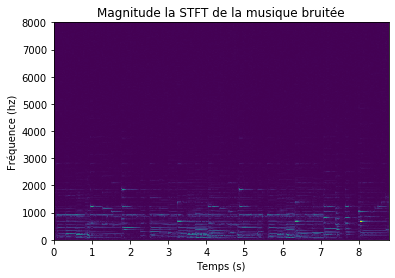

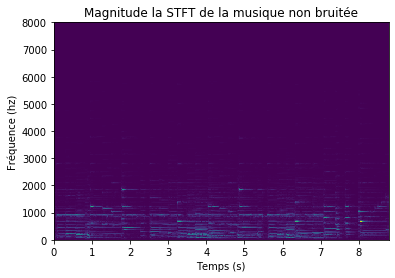

In [33]:
plt.title('Magnitude la STFT de la musique bruitée')
plt.pcolormesh(tps, freq, np.abs(noised_music_1_stft), vmin=0)
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (hz)')
plt.figure()
plt.title('Magnitude la STFT de la musique non bruitée')
plt.pcolormesh(tps, freq, np.abs(music_1_stft), vmin=0)
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (hz)')
plt.show()

In [14]:
def SnF(noise, rate, alpha):
    freq, tps, noise_stft = stft(noise, rate, nperseg=1000)
    # On moyenne temporellement pour chaque fréquence
    snf = np.power(noise_stft,alpha).mean(1)
    snf_ext = np.transpose(np.repeat([snf], 282, axis=0))
    return snf_ext

In [34]:
def denoisedSignal(y, snf, alpha, beta):
    n_A = np.add(np.power(y,alpha),-snf)
    d_A = np.add(np.power(y, alpha),eps)
    A = np.power(np.divide(n_A, d_A), beta)
    return A*y

In [38]:
alpha = 2
beta = 0.5
snf = SnF(glob_noise_1,rate_1, alpha)
denoised_music_stft = denoisedSignal(noised_music_1_stft, snf, alpha, beta)
tps, denoised_music = istft(denoised_music_stft, rate_1, nperseg=1000)

In [39]:
wav.write("denoised_music.wav", rate_1, np.int16(denoised_music))
wav.write("noised_music.wav", rate_1, np.int16(noised_music_1))